In [1]:
import numpy as np
import csv
import tensorflow as tf

tf.python.control_flow_ops = tf

#Normalize
def normalize(image_data):
    a = -1
    b = 1
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

#Resizing
from scipy.misc import imread
import scipy.misc as sp
def resize_and_crop():

    length = len(y_train)
    shape = (80,160)
    
    for i, loc in zip(range(length),data['img']):        
        image = imread(loc)        
        image = sp.imresize(image, size=shape, interp='cubic')
        X_train[i] = image[27:65,:]              
        print("Resize and crop: ",i,"/",length)        
    print("Images size become :",X_train[0].shape)

    
#Model
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D   
from keras.layers.advanced_activations import ELU

def model_1():
	model = Sequential()
	model.add(Convolution2D(24, 5, 5,input_shape=(80, 160, 3),subsample=(2, 2)))
	model.add(Convolution2D(36, 5, 5,subsample=(2, 2)))
	model.add(Convolution2D(48, 5, 5,subsample=(2, 2)))
	model.add(Convolution2D(64, 3, 3))
	model.add(Convolution2D(64, 3, 3))
	model.add(Flatten())
	model.add(Dense(100,activation='relu'))
	model.add(Dense(50,activation='relu'))
	model.add(Dense(10))
	model.add(Dense(1))
	return model

def model_2():
	model = Sequential()
	#input(80,160,3) output(24,88,24)
	model.add(Convolution2D(24, 5, 5,input_shape=(80, 160, 3),subsample=(2, 2)))	
	model.add(Dropout(0.5))	
	model.add(Convolution2D(36, 5, 5,subsample=(2, 2)))	
	model.add(Dropout(0.5))	
	model.add(Convolution2D(48, 5, 5,subsample=(2, 2)))	
	model.add(Dropout(0.5))
	model.add(Convolution2D(64, 3, 3))		
	model.add(Convolution2D(64, 3, 3))		
	model.add(Flatten())
	model.add(Dense(100,activation='relu'))
	model.add(Dense(50,activation='relu'))
	model.add(Dense(10))
	model.add(Dense(1))
	return model

def model_3():
    model = Sequential()
    elu = ELU(alpha=1.0)
    #input(38,160,3) output(36,88,24)
    model.add(Convolution2D(24, 3, 3,input_shape=(38, 160, 3),name='C1'))
    model.add(elu)
    model.add(Dropout(0.5))
    model.add(Convolution2D(36, 5, 5,name='C2'))
    model.add(elu)              
    model.add(Dropout(0.5))
    model.add(Convolution2D(48, 5, 5,name='C3'))
    model.add(elu)
    model.add(Dropout(0.5))
    model.add(Convolution2D(64, 3, 3,name='C4'))
    model.add(elu)
    model.add(Convolution2D(64, 3, 3,name='C5'))
    model.add(elu)
    model.add(Flatten())
    model.add(Dense(100,activation='tanh',name='L1'))
    model.add(Dense(50,activation='tanh',name='L2'))
    model.add(Dense(10,name='L3'))
    model.add(Dense(1,name='L4'))
    return model

Using TensorFlow backend.


In [2]:
#Data Loading

#mydata
#data = np.genfromtxt('./driving_log_main.csv',dtype=[('img','U110'),('angle','f8')],delimiter=",",usecols=(0,3))
#dummy
data = np.genfromtxt('./dummy.csv',dtype=[('img','U110'),('angle','f8')],delimiter=",",usecols=(0,3))
#udacity data
#data = np.genfromtxt('./data/driving_log.csv',dtype=[('img','U110'),('angle','f8')],delimiter=",",usecols=(0,3), skip_header=1)

y_train = data['angle']
X_train = np.empty([len(y_train),38,160,3]).astype(np.uint8) 

#resize and crop
resize_and_crop()

Resize and crop:  0 / 3
Resize and crop:  1 / 3
Resize and crop:  2 / 3
Images size become : (38, 160, 3)


In [6]:
#Shuffle
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train) 

#Pre-processing
print("Nomalizing starts")
X_normalized = normalize(X_train)
print("Nomalizing finished.\n")

Nomalizing starts
Nomalizing finished.



IndexError: index 200 is out of bounds for axis 0 with size 3

In [19]:
#Complie
Learning_Rate=0.001
model = model_3()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

#Train
history = model.fit(X_normalized, y_train, 
	nb_epoch=2, 
	validation_split=0.05)
 	
#Save Model
from keras.models import load_model
import json

json_str = model.to_json()
with open('model.json','w') as f:
    json.dump(json_str, f)
model.save_weights('model.h5')
print("Saved model to disk")

Nomalizing starts
Nomalizing finished.
Train on 2 samples, validate on 1 samples
Epoch 1/2
2/2 [==============================] - 2s - loss: 0.2757 - acc: 0.5000 - val_loss: 37.8084 - val_acc: 0.0000e+00
Epoch 2/2
2/2 [==============================] - 0s - loss: 34.0227 - acc: 0.0000e+00 - val_loss: 24.4681 - val_acc: 0.0000e+00
Saved model to disk


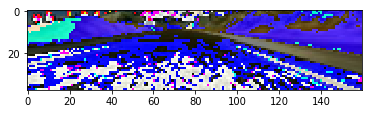

In [1]:
import numpy as np
import csv
from scipy.misc import imread
import matplotlib.pyplot as plt

image = np.load("./a.npy")        
    
plt.imshow(image[0])
plt.show()


